# Week 4: Homework 1 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

The goal of this practice is to analyze the performance of different estimators on the Diabetes problem and we will analyze, by means of different approximations, which input features are more relevant to solve this problem. 

Note that previous week we already worked on Diabetes database, but we only used one of the input variable (BMI) to construct the regression model; in this practice we will use all the input features jointly.

To solve these notebook, complete the following sections implementing the solution that you consider most appropriate and showing the results that you find most interesting. For the evaluation of this notebook,  we will take into account the methodology used, the solution adopted, the presentation of the results and the conclusions obtained at the light of the results.


## 1. Data loading and preprocessing

Following the ML pipeline, start loading the data, creating the partitions that you consider necessary and carrying out the preprocessing that you need.

Keep in mind that there is no single valid solution, and different reasons can lead you to make different data partitions or apply different normalizations. So **please justify the steps you are taking**.

In [1]:
# Data loading and preprocessing

# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
feature_names = diabetes.feature_names

Data is to be partitioned into training and test data (80%-20% respectively). No validation set is to be generated as later we will be using cross-validation with the function GridSearchCV, which performs the training-validation partition by itself.

Then, both data partitions are normalized.

In [3]:
# Generate train and test partitions
import random
random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

# Data normalization
transformer = StandardScaler().fit(X_train)  # fit() learns mean and std parameters
X_train = transformer.transform(X_train) # transform() normalizes
X_test =  transformer.transform(X_test)

**Note**: it has been observed that changing the random_state of the train_test_split function (or eliminating it, letting it random) greatly changes the test scores yielded, and sometimes the choice of the hyperparameters. This makes sense, as our database only contains 442 data points, and therefore which ones we include in the test and training sets affects the results. 

There is little we can do about it. To make results reproducible, the random seed has been fixed, and the random_state is also set to a fixed value (0).

## 3. Study of feature relevance and feature selection

In this last section, using different criteria, you have to analyze the relevance of the input features. Thus, you will have to find a subset with the $D'$ most relevant features and, using this subset of features, analyze the final performance of a regressor (for the sake of simplicity, consider a linear ridge regressor as final regressor).

To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on the validation error**: if there were $D$ input features, we could try to train $D$ regressors where each regressor uses one (and only one) different input feature. According to the final perfomance of each regressor (evaluated on a validation set or with a CV proccess), we could rank the features (the most relevant feature is the one providing the lowest error). Using this ranking, we can select the $D'$ most relevant features as the $D'$ top-ranked ones. Note that this scheme only analyzes the isolated relevance of each feature to predict the output; so, it is said that this approach is *univariate*.

 <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/FeatureRanking.png" width="90%" > 


2. **Greedy search based on the validation error**: approach (1) has the disadvantage of not taking into account relationships between features. For instance, method (1) would not realize that two features can be rendundant or that a feature, that is useless by itself, can be very useful combined with another feature. To overcome this drawback, we should have to analyze subsets of features; however, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Fordward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" > 

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" > 

3. **Ridge linear regression with a prunning**: We know that the L2 regularization limits the magnitude of the weight vector to avoid overfitting problems, but these weigths do not become to null. However, in a linear model, *the weight magnitude can be an indicative of the feature relevance* and, unlike approach (1), all features are analyzed at the same time (*multivariate approach*). Use the weigth magnitude to generate a ranking of features and, later, use this ranking to select the $D'$ most relevant features.

4. **Lasso linear regression**: In this case, the L1 penalty allows us to directly eliminate some of the input features. Explore different values of the regularization parameter $\lambda$ to get a sequence of selected feature sets (from a single feature to all features).


5. **Elastic-net linear regression**: This last approach combines L1 and L2 regularizations, thus including the advantages of both methods. Varying adequately their regularization parameters, create a sequence of feature selection subsets. 



Final comments:

* Due to part of the feature selection process involves selecting the optimum number of features, to avoid additional complexity (having to validate this number), you can analyze the different methods by exploring the curves of MSE vs. number of selected features ($D'$).

* It is not necessary to apply all these methods to complete this notebook (you can choose, at least, three of them). In fact, the implementation of greedy search approaches require an advanced knowledge of Python; so take this into account when you design your notebook solution.

* **Please, analyze in detail the different results, pointing out the advantages/disadvantages of each feature selection scheme**. Think about the behaviour of the different criteria in cases where a feature is irrelevant or there are redundant features. Additional experiments helping you to support any of your conclusions will be welcome.

In [4]:
## 3. Feature selection 

# Include your code here (create as many cells as you need)

### Evaluating of the results of feature selection
Just at the end of the previous section, we saw that the best result (over the test set) was 0.437 (R2 score) for the linear unregularized regressor. For that regressor, we were using all available features. Therefore, using less features in this section it is not possible to get a better result than that one, and our aim is to obtain scores close to that one but using a lower number of features.

### Method 4 : Feature selection with Lasso linear regression
With Lasso (L1) regularization, some of the weigths usually tend to zero. Therefore, it can be used for feature selection.

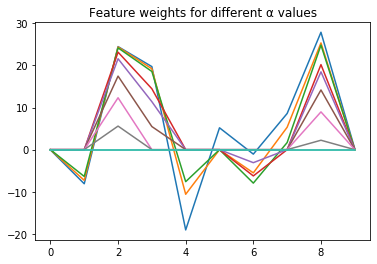

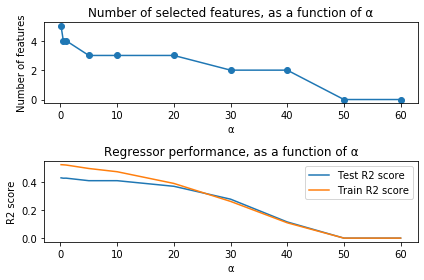

In [41]:
import sklearn.linear_model as ln


rang_alpha = [0.1,0.5,1,5,10,20,30,40,50,60] # From the polynomial regression section, this is the alpha range in which best results are obtained

weights = np.zeros((len(rang_alpha),X_train.shape[1]))
threshold = 1
features_selected = np.zeros((len(rang_alpha),X_train.shape[1]))
n_features = np.zeros((len(rang_alpha),))
test_score = np.zeros((len(rang_alpha),))
train_score = np.zeros((len(rang_alpha),))

plt.plot()
for (i,a) in enumerate(rang_alpha):
    lasso = ln.Lasso(fit_intercept=True,alpha=a).fit(X_train,Y_train)
    weights[i,:] = lasso.coef_
    features_selected[i,:] = lasso.coef_ > threshold
    n_features[i] = np.sum(features_selected[i,:])
    test_score[i] = lasso.score(X_test,Y_test)
    train_score[i] = lasso.score(X_train,Y_train)
    plt.plot(lasso.coef_,label='alpha = '+str(a))

plt.title('Feature weights for different \u03B1 values')
plt.show()

plt.figure()
plt.subplot(211)
plt.title('Number of selected features, as a function of \u03B1')
plt.plot(rang_alpha,n_features,'o-',label='Number of features')
plt.ylabel('Number of features')
plt.xlabel('\u03B1')


plt.subplot(212)
plt.plot(rang_alpha,test_score,label='Test R2 score')
plt.plot(rang_alpha,train_score,label='Train R2 score')
plt.title('Regressor performance, as a function of \u03B1')
plt.ylabel('R2 score')
plt.xlabel('\u03B1')
plt.legend()
plt.tight_layout()
plt.show()

From the first plot, we can easily see that features 2 and 8 are the most relevant. And features 0, 1, 4, 5, 7 and 9 are irrelevant (weight to zero) for most alphas, except low values.

In the second plot (upper part), it is easy to see how increasing alpha yields a lower number number of selected features, i.e. more weights go to zero. But also the performance of the regressor gets worse. Nevertheless, we can see that reducing to 3 or 4 features, the regressor still yields a good performance, close to the optimal performance of 0.43 yield by the linear regressor at the end of section 2.

For example, let's select the first alpha for which the model already only uses 3 features, $\alpha$ = 5.

In [55]:
a = 5 
i = 3
features = np.where(features_selected[i,:] == 1)[0]
lasso = ln.Lasso(fit_intercept=True,alpha = 5).fit(X_train,Y_train)
print('The performance with features %d, %d and %d (%s, %s and %s):' %(features[0],features[1],features[2],feature_names[features[0]],feature_names[features[1]],feature_names[features[2]]))
print('\tTrain R2 score %.3f. Test R2 score %.3f.' %(lasso.score(X_train,Y_train),lasso.score(X_test,Y_test)))

The performance with features 2, 3 and 8 (bmi, bp and s5):
	Train R2 score 0.500. Test R2 score 0.413.


We can see that the selected features are 2, 3 and 8, what could already be predicted from the first graph above. And the test score it yields is quite close to the 0.437 of the linear regressor with all features. Therefore, we can conclude that these 3 features are providing most of the information needed to predict the output, and therefore these 3 patient characteristics (BMI, blood pressure and S5) are the most relevant to measure in order to predict diabetes progression.

### Method 2.1 : Forward search

In [102]:
from sklearn.model_selection import GridSearchCV

# Let's define how many features we want to select
features_to_select = 3

# We are going to use a Ridge (L2 regularization) regressor.
# Therefore, we have to define possible alpha values
rang_alpha = [0.1,0.5,1,5,10,20,30,50,70, 100, 200, 300, 500] 
parameters = {'alpha':rang_alpha}

n_features = X_train.shape[1]
selected_features = []  # initialize, there are no selected features at the beginning
X_partitions = [None]*n_features  # Creates a list, to contain the different versions (combinations of features) of the training set
scores = np.zeros((n_features,))  # An array that will contain the test score of each feature

for fts in range(features_to_select):
    
    for f in range(n_features):
        # Iterate along all features, and create a new training matrix with all data points, 
        # and features f and selected features (which are those selected in previous iterations of the outer loop)
        
        # This is the new training matrix. It has columns =  #selected_features + 1, to allow to include also feature "f"
        X_sel = np.ones((X_train.shape[0],len(selected_features)+1)) 
        
        # Include the already selected features
        for (i,sf) in enumerate(selected_features):
            X_sel[:,i] = X_train[:,sf]  # Create a matrix containing the previously selected features
            
        # Include the new feature, only if it is not already one of the selected features
        if ((f in selected_features)==False):
            X_sel[:,-1] = X_train[:,f]  # Add each of the other (distint) features
        else:
            X_sel = X_sel[:,:-1]
            # Else, if that feature has already been selected, eliminate the last column.

        # For the selected data, and different values of alpha, perform cross-validated search
        clf = GridSearchCV(ln.Ridge(),parameters,cv=5,iid=False).fit(X_sel,Y_train)
        # Find the score of the best performing alpha, that is, the best that adding this feature can provide
        scores[f] = clf.cv_results_['mean_test_score'][np.where(clf.cv_results_['rank_test_score']==1)[0][0] ]

    # The feature with the highest score (the one left at the end when sorting scores) is added to the selected features
    selected_features.append(np.argsort(scores)[-1])
    print(selected_features)         

[2]
[2, 8]
[2, 8, 3]


The obtained result is exactly the same than the one obtained before, with method 4. The same features get selected. Moreover, we can see in which order they are selected, what can also be of interest.